# Workshop - I

## Objective:
In this module, we will explore various regression and classification models to evaluate their performance on a given dataset, ultimately determining which model delivers the best results:

- **1. Regression Models:**
     - Dataset Description

     - Conduct Exploratory Data Analysis (EDA) on the dataset.
      - a. Basic Information
      - b. Examine the Target Variable
      - c. Examine Feature Variables
      - d. Feature-Target Relationship
      - e. Check for Multicollinearity

     - Data pre-processing

     - Train and evaluate different regression models:
      - a. Simple Linear Regression
      - b. Polynomial Regression
     

- **2. Classification Models:**
     - Dataset Description

     - Conduct Exploratory Data Analysis (EDA) on the dataset.
      - a. Basic Information
      - b. Examine the Target Variable
      - c. Examine Feature Variables
      - d. Check for Multicollinearity

     - Data pre-processing

     - Train and evaluate different classification models:
      - a. Logistic Regression
      - b. K-Nearest Neighbours (KNN)
      - c. Naive Bayes

     - Hyperparameter tuning using techniques such as   GridSearchCV or RandomizedSearchCV

#1. Regression Models



## 1.1 Dataset Description

<center><img src="https://i.pcmag.com/imagery/articles/00p0Qzwvctko7LmNqSYnPAE-10..v1713208898.jpg" width=500/></center>

**Problem Statement:**

Develop a model that predicts the price range of mobile phones based on their features and specifications. The goal is to classify mobile devices into different price categories (e.g., low, medium, high) using attributes such as battery life, screen size, RAM, processor speed, and camera quality. This model will assist manufacturers, retailers, and consumers in understanding how various features contribute to the overall cost of mobile devices.

**Dataset:**
Dataset is taken from kaggle - <a href='https://www.kaggle.com/datasets/ganjerlawrence/mobile-phone-price-prediction-cleaned-dataset'>link</a>

This data set is a collection for information about various mobile phone type . it is a cleaned data set made available for beginners who want to learn on how to implement machine learning algorithms rather than spending time cleaning the data set. you can just concentrate on building your models

The columns available in the dataset are:-

- **Ratings:** This field contains the various rating given by customers
- **Ram:** This field contain the Ram capacity of the phone in GB
- **ROM:** This is field contains the number of space available in the phone in GB
- **Mobile_Size:** This is the int size of the screen
- **Primary_Cam:** This is the number of pixels of the Back camera
- **Selfi_Cam:** The number of Pixels of the front camera
- **Battery_Power:** The battery power
- **Price:** The price of the mobile phone in INR(indian Rupees)

All the fields are already in numerical values either `int` or `float`.



## 1.2 Importing the necessary libraries & modules

In [3]:
# Import the warnings module, which allows control over warning messages
import warnings

# Suppress all warnings in the script
warnings.filterwarnings("ignore")

In [5]:
!pip install statsmodels

You should consider upgrading via the 'C:\Users\Rajeev\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [6]:
# Importing libraries for numerical operations and data manipulation
import numpy as np     # For numerical computations
import pandas as pd    # For handling dataframes and data manipulation

# Importing libraries for data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For enhanced visualizations

# Importing metrics for evaluating regression model performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Metrics to evaluate models

# Importing utilities for splitting data and applying feature transformations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets


# Importing models for regression tasks
from sklearn.linear_model import LinearRegression     # For linear regression model


# Importing libraries for statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # To calculate VIF for multicollinearity
import statsmodels.api as sm   # For advanced statistical modeling

## 1.3 Loading the data

- `read_csv()` helps to load a csv file.
- `head()` helps to view the initial few rows of the dataset.

In [9]:
# Load the dataset from a CSV file into a DataFrame
data = pd.read_csv('Mobile-Price-Prediction-cleaned_data.csv')


# Display the first five rows of the DataFrame to get an initial overview of the data
data.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


# 1.4 Exploratory Data Analysis (EDA)

#1.4.1 Basic Information

 Get an initial overview of the dataset to understand its structure, types of variables, and any immediate data quality issues.

- `info()` gives information about the dataset.
- `describe()` provides the basic statistical details about the dataset.

In [10]:
# Display a summary of the Dataset
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,4.112639,5.941760,64.390335,5.620660,47.821561,8.868649,3278.859975,14269.167286
std,0.367830,2.056359,53.868626,3.957409,11.155916,4.547254,937.628801,23092.739983
min,2.800000,0.000000,2.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.000000
50%,4.100000,6.000000,32.000000,4.770000,48.000000,8.000000,3000.000000,1699.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18994.500000
max,4.800000,12.000000,256.000000,44.000000,64.000000,23.000000,6000.000000,153000.000000


### Interpretation:
- Do all the columns have the correct data types?
  
  

- Are there any null values in the dataset?
  
  
  

In [14]:
# Generate descriptive statistics for the numerical columns in the data
print(data.dtypes)
print(data.isnull().any())

Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object
Ratings          False
RAM              False
ROM              False
Mobile_Size      False
Primary_Cam      False
Selfi_Cam        False
Battery_Power    False
Price            False
dtype: bool


### Interpretation:
- Which features might contain outliers? Why?



1. Min value of RAM showing 0

2. Min value of Selfi_Cam showing 0

## 1.4.2 Distribution Analysis of the target variable

*Hint: Use the kdeplot*
- `sns.kdeplot()` visualizes the distribution of observations in a dataset.



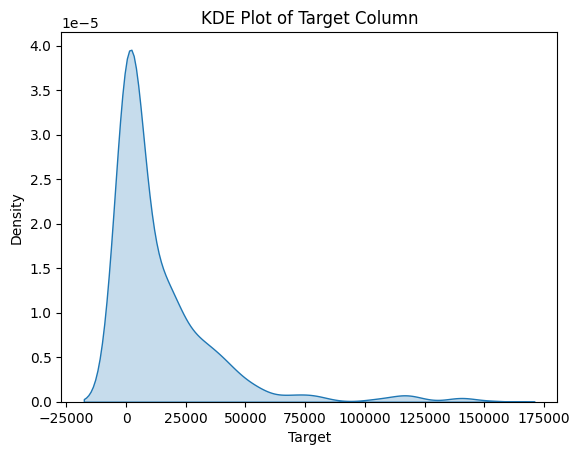

In [17]:
# KDE plot of the target column
# Replace the placeholder <> with the target column of the loaded dataset . Eg. df['Price']
sns.kdeplot(data['Price'], shade=True)

# Adding labels and title
plt.xlabel('Target')
plt.ylabel('Density')
plt.title('KDE Plot of Target Column')

# Show plot
plt.show()

### Interpretation:
- What does the KDE plot of the target column indicate about the distribution?



- What does the shape of this distribution suggest about the nature of the target variable?

  
- Are there any outliers or extreme values present in the target column?


- Where is the peak of the distribution located?

  
- How does the density change across the range of target values?

  


## 1.4.3 Outlier Analysis of the target variable

*Hint: Use the boxplot*
- `sns.boxplot()` helps to visualize the observations using a boxplot.

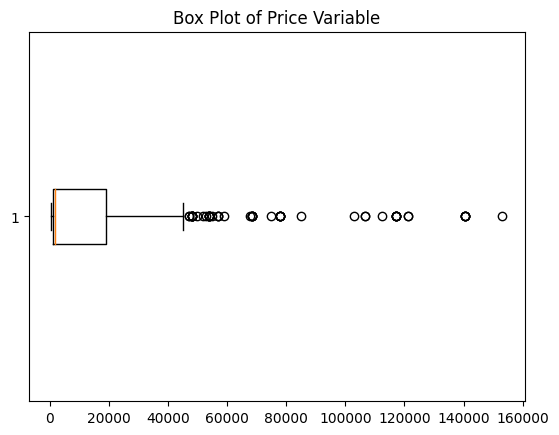

In [22]:
# Outlier analysis using boxplot
# Replace the placeholder <> with the boxplot code - `sns.boxplot()` containing the target column `df['Price]` as the parameter
plt.boxplot(data['Price'], vert=False)
plt.title('Box Plot of Price Variable')
plt.show()

### Interpretation:
- Are there any outliers present in the "Price" variable?


- Where is the median of the `Price` variable located?
  


In [20]:
print(data['Price'].median())

1699.0


## 1.4.4 Correlation Analysis of the dataset

*Hint: Use heatmap*
- `corr()` calculates the correlation between columns in a DataFrame.
- `sns.heatmap()` helps to visualize the correlation values as a color coded matrix.

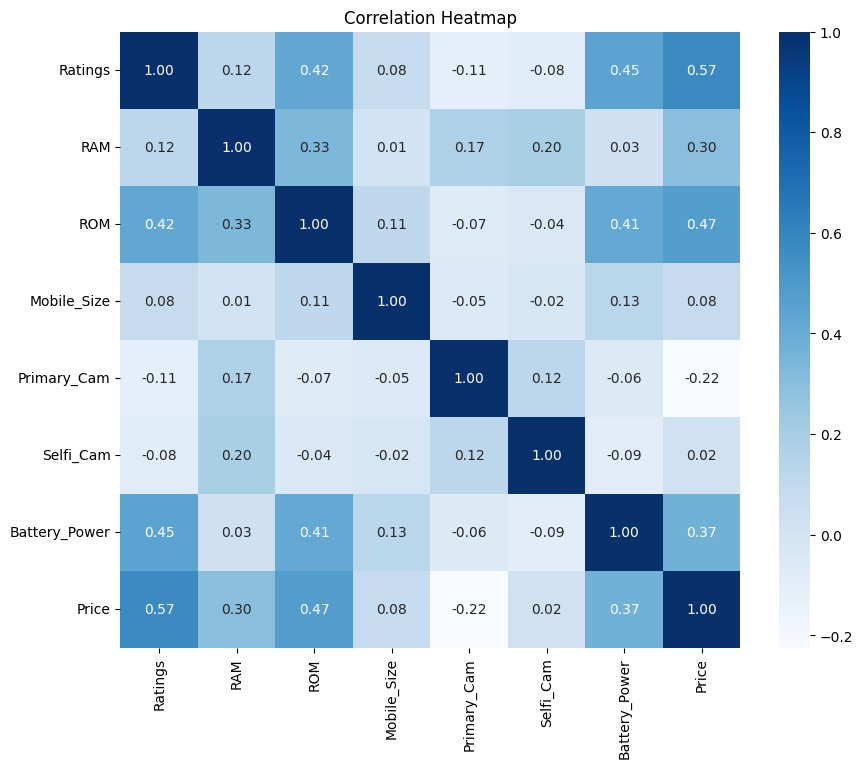

In [23]:
# Calculate the correlation matrix for the DataFrame to understand the relationships between numerical variables
# Replace the placeholder with the code to find the correlation `df.corr()` and assign it to a variable say `corr`
corr_var = data.corr()


# Set up the figure for the heatmap with a size of 10x8 inches
plt.figure(figsize=(10, 8))

# Plot the heatmap of the correlation matrix
# annot=True adds the correlation coefficients on the heatmap
# cmap='Blues' specifies the color map
# fmt='.2f' formats the annotation to two decimal places

# Replace the placeholder <1> with the code for creating the heatmap - `sns.heatmap()`
# Replace the placeholder <2> with the variable containing correlation values say 'corr'
sns.heatmap(corr_var, annot=True, cmap='Blues', fmt='.2f')

# Add a title to the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

### Interpretation:

- Which features have the strongest positive correlation with `Price`?
  

- Is there any feature with a negative correlation with `Price`?
  

- How strongly are `RAM` and `Price` correlated?
  
- What is the relationship between `Ratings` and `Battery_Power`?
  

- Are there any features that have little to no correlation with `Price`?

  

- Is there any strong correlation between the features?

  

## 1.5 Model Building

### 1.5.1 Linear Regression

- `df.column` lists down the names of all the columns of the dataframe `df`.
- `train_test_split()` helps to split the data into training and test datsets.
- `StandardScaler` from `sklearn.preprocessing` helps to scale the data before modelling.
- `OLS()` from `sm` (`statsmodels` library) helps to fit a linear regression model on the data. This is done as `model = sm.OLS(y_train, X_train).fit()`.
- `model.summary()` provides a detailed summary with all the metrics of the fitted linear regression model.

In [24]:
# Check the columns of the data to identify the features
data.columns

Index(['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power', 'Price'],
      dtype='object')

In [39]:
# Select features and target variable for regression
# Replace the placeholder with the names of all the columns in the dataset except the target variable - 'Price'
features = ['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power']

# Split the data into features (X) and target (y)
# Replace the placeholder <1> with the dataset containing the features only - say `df[features]`
# Replace the placeholder <2> with the target column say `df['Price']`
X = data[features]
y = data['Price']

# Split into training and testing sets
# Replace the placeholder <method to do split> with the methos used to do the test-train split - say `train_test_split`
# Replace the placeholder <features dataset> with the variable where the dataset containing only the features are stored- say `X`
# Replace the placeholder <target> with the variable where the target data is stored- say `y`
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42) # training phase and testing phase

# Check the data
print("Trained Data:")
print(X_train[:5])
print("\n\nTest Data:")
print(X_test[:5])

Trained Data:
     Ratings  RAM    ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power
788      4.5  6.0  128.0         6.39           48       13.0           3800
637      4.0  6.0   32.0         4.50           48        8.0           3000
444      3.9  6.0   32.0         4.50           48       11.0           3000
332      4.3  3.0   32.0         6.22           38        8.0           4030
291      3.8  6.0   32.0         4.54           25        8.0           3000


Test Data:
     Ratings  RAM   ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power
697      3.8  6.0  32.0         4.54           25       11.0           3800
296      4.1  6.0  64.0         4.50           48        8.0           3000
227      3.7  6.0  64.0         4.50           48        8.0           3000
336      4.3  6.0  64.0         6.50           48        8.0           5000
537      4.1  6.0  32.0         4.54           48       20.0           3000


In [46]:
# Standardize the features
# Import the library
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
# Replace the placeholder <> with the method to initiate the standard scaler - `StandardScaler()`
scaler = StandardScaler() #MinMaxScaler()

# Scale the train and test data
# Replace the placeholder <1> to fit & transform the training data using `scaler` - `scaler.fit_transform(X_train)`
# Replace the placeholder <2> to transform the test data using `scaler` - `scaler.transform(X_test)`
X_train = scaler.fit_transform(X_train) #computes mean and std dev and then transforms the data
X_test = scaler.transform(X_test) #uses the mean and std dev computed in the previous step to transform the data
# Check the data
X_train[:5]

array([[ 1.05672500e+00,  1.50829992e-03,  1.17842235e+00,
         2.07926298e-01,  1.41105799e-02,  9.23705036e-01,
         5.72882573e-01],
       [-3.03729343e-01,  1.50829992e-03, -6.04108782e-01,
        -2.83960196e-01,  1.41105799e-02, -1.84947268e-01,
        -2.83292851e-01],
       [-5.75820212e-01,  1.50829992e-03, -6.04108782e-01,
        -2.83960196e-01,  1.41105799e-02,  4.80244115e-01,
        -2.83292851e-01],
       [ 5.12543265e-01, -1.45777187e+00, -6.04108782e-01,
         1.63682539e-01, -8.69513114e-01, -1.84947268e-01,
         8.19033007e-01],
       [-8.47911081e-01,  1.50829992e-03, -6.04108782e-01,
        -2.73549900e-01, -2.01822392e+00, -1.84947268e-01,
        -2.83292851e-01]])

In [49]:
# Model Building using statsmodels library
# Import the modules
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Add the intercept term
X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
# Replace the placeholder <> with the code to split the test-train data in ration of 70:30 - `train_test_split(X, y, test_size = 0.30 , random_state = 1)`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Create the model
# Replace the placeholder <> with code to fit the OLS model - `sm.OLS(y_train, X_train).fit()`
# Note that `y` comes after `X` here in this
model1 =  sm.OLS(y_train, X_train).fit()

# Get the model summary
# Replace the placeholder <> with the code to provide the model summary - `model1.sumamry()`
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     67.33
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           4.27e-70
Time:                        13:19:10   Log-Likelihood:                -6330.0
No. Observations:                 564   AIC:                         1.268e+04
Df Residuals:                     556   BIC:                         1.271e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.044e+05   1.06e+04     -9.877      0.000   -1.25e+05   -8.36e+04
Ratings        2.595e+04   2477.259     10.476      0.000    2.11e+04    3.08e+04
RAM            2652.9417    427.778      6.202      0.000    1812.682    3493.201
ROM              75.0025     17.812      4.211      0.000      40.016     109.989
Mobile_Size      -6.7907    165.372     -0.041      0.967    -331.621     318.040
Primary_Cam    -445.4488     71.872     -6.198      0.000    -586.623    -304.275
Selfi_Cam       371.3071    179.719      2.066      0.039      18.297     724.318
Battery_Power     3.0023      0.934      3.215      0.001       1.168       4.836
==============================================================================
Omnibus:                      383.490   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4736.840
Skew:                           2.891   Prob(JB):                         0.00
Kurtosis:                      15.967   Cond. No.                     4.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation:
- What do you think about the metrics?
  
- Does the data suffers from multicollinearity?
  

### 1.5.2 Multicollinearity Analysis
Checking for multicollinearity involves assessing the degree to which independent variables in a regression model are highly correlated with each other.

- **Variance Inflation Factor:**

  - VIF, or Variance Inflation Factor, is a measure used to detect the presence of multicollinearity in a regression model.

  - High VIF values indicate that a predictor variable is highly correlated with other predictors, which can make the coefficient estimates unstable and difficult to interpret.
  - Low VIF values suggest little to no multicollinearity.

- **Interpreting VIF values:**
  - **VIF = 1:** No multicollinearity; the predictor is not correlated with other variables.
  - **1 < VIF ≤ 5:** Low to moderate multicollinearity; generally acceptable but worth monitoring.
  - **VIF > 5:** Indicates moderate multicollinearity; may start affecting the reliability of the model's coefficients.
  - **VIF > 10:** High multicollinearity; problematic and often signals that the variable should be removed or combined with others.

  *Note: Understand this code and run this. Your task for this section is to understand what is vif and how to interpret the values.*

In [50]:
# Import the required modules
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame and it is already loaded
# Remove non-numeric columns if any
df_numeric = data.select_dtypes(include=[float, int])

# Define a function to calculate VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

# Calculate VIF for the dataset
vif_df = calculate_vif(df_numeric)

# Display the VIF values
print(vif_df)

         Feature        VIF
0        Ratings  41.563787
1            RAM  11.955536
2            ROM   3.684761
3    Mobile_Size   3.067169
4    Primary_Cam  21.168871
5      Selfi_Cam   5.024410
6  Battery_Power  18.591624
7          Price   2.157319


### Interpretation:

- Which features exhibit high multicollinearity?

  


- What action should be considered for features with high VIF values?




### 1.5.3 Random Forest Regressor

The Random Forest Regressor is an advanced machine learning algorithm that combines multiple classifiers(decision trees) to improve predictive accuracy and control overfitting.  The final prediction is obtained by averaging the predictions from all the individual classifiers. This approach reduces the variance of the model and is particularly effective in handling large datasets and capturing complex relationships between variables. Random Forest Regressors are also robust to multicollinearity and can provide insights into feature importance.

*Note: You will learn about decision trees and random forest working in the later sessions through this course.*

- `RandomForestRegressor` from `sklearn.ensemble` leps to fit a random forest regressor.

In [ ]:
# Import the module
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
# Replace the placeholder with the code to fit the model using the model created - `rf_regressor.fit(X_train, y_train)`
<>

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

### Interpretation:
- Does the model perform well?




### 1.5.4 Visualizing the result

- `sns.scatterplot()` helps to plot the true values vs predicted values.
- `plot()` helps to draw the diagonal line showing the fitted regression line.

In [ ]:
# Create a scatter plot of true values (y_test) vs. predicted values (y_pred)
# Replace the placeholder <1> with the name of the method for visualizing - `sns.scatterplot()`
# Replace the placeholder <2> with the variable containing the true y values of the test data - `y_test`
# Replace the placeholder <3> with the variable containing the predicted y values of the test data - `y_pred`
<1>(x=<2>, y=<3>, color='blue', s=50)

# Add a diagonal line (red) that represents the ideal scenario where predicted values match the true values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Diagonal line

# Label the x-axis as 'True Values'
plt.xlabel('True Values')

# Label the y-axis as 'Predicted Values'
plt.ylabel('Predicted Values')

# Set the title of the plot to 'True vs Predicted Values'
plt.title('True vs Predicted Values')

# Display the plot
plt.show()

### Interpretation:
- What does the plot indicate about the model predictions?
  
  
<hr> <hr>

#2. Classification Models


## 2.1 Dataset Description

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

<center><img src="https://miro.medium.com/v2/resize:fit:1400/1*D7TDOkHIH8hmbYQtCZ856A.jpeg" width=500/></center>

Dataset as 21 features and 2000 entries. The meanings of the features are given below.

- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Mega Byte
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
-`price_range`: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)


## 2.2 Importing the required libraries & modules

In [63]:
# Import the warnings module, which allows control over warning messages
import warnings

# Suppress all warnings in the script
warnings.filterwarnings("ignore")

In [62]:
# Importing libraries for numerical operations and data manipulation
import numpy as np     # For numerical computations and array manipulations
import pandas as pd    # For handling DataFrames, and data loading, cleaning, and manipulation

# Importing libraries for data visualization
import matplotlib.pyplot as plt  # For creating basic plots (histograms, scatter plots, etc.)
import seaborn as sns            # For enhanced and more aesthetically pleasing visualizations

# Importing machine learning models and evaluation metrics
from sklearn.naive_bayes import GaussianNB                      # Gaussian Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier              # K-Nearest Neighbors (KNN) classifier
from sklearn.linear_model import LogisticRegression             # Logistic Regression classifier

# Importing utilities for model evaluation and hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting the dataset into training and test sets, and grid search for hyperparameter tuning

# Importing evaluation metrics for classification tasks
from sklearn.metrics import (accuracy_score, classification_report,  # Metrics to evaluate model performance
                             precision_score, recall_score,
                             f1_score, confusion_matrix)


## 2.3 Loading & Viewing the data

- `read_csv()` helps to load a csv file.
- `head()` helps to view the initial few rows of the dataset.
- `df.shape` gives the shape (rows by columns) of the dataset `df`.

In [ ]:
# Load the dataset
# Replace the placeholder to load the data - `pd.read_csv('mobile_data_new.csv')`
df = <>

# View the data
# Replace the placeholder with the code to view the first few rows of the data
<>

In [ ]:
# Get the shape of the DataFrame
df.shape

## 2.4 Exploratory Data Analysis (EDA)


### 2.4.1 Basic Information

- `info()` helps to get the basic information about the dataset.
- `value_counts()` count the number of occurrences of each unique value in a DataFrame column.


In [ ]:
# Get the basic info of the DataFrame
df.info()

### Interpretation:
- Are there any null values in the dataset?
  


### 2.4.2 Examine the Target Variable


In [ ]:
# Check the target variable distribution
# Replace the placeholder <> with the method used to find the unique values in a column - `value_counts()`
data['price_range'].value_counts(normalize=True)


KeyError: 'price_range'

### Interpretation:

- Does the dataset have class imbalance?


### 2.4.3 Correlation Analysis

*Hint: Use heatmap*
- `corr()` calculates the correlation between columns in a DataFrame.
- `sns.heatmap()` helps to visualize the correlation values as a color coded matrix.

In [ ]:
# Calculate the correlation matrix for the DataFrame to understand the relationships between numerical variables
# Replace the placeholder with the code to find the correlation values of the dataset - `df.corr()`
corr = <>

# Set up the figure for the heatmap with a size of 10x8 inches
plt.figure(figsize=(18, 10))

# Plot the heatmap of the correlation matrix
# annot=True adds the correlation coefficients on the heatmap
# cmap='Blues' specifies the color map
# fmt='.2f' formats the annotation to two decimal places

# Replace the placeholder with the variable having the correlation values
sns.heatmap(<>, annot=True, cmap='Blues', fmt='.2f')

# Add a title to the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

### Interpretation:

- Which features are most strongly correlated with the target variable `price_range`?
   

- Are there any features that have a notable correlation with each other?
  




## 2.5 Feature Engineering

### 2.5.1 Create new features based on highly correlated ones to avoid multicollinearity

This code performs feature engineering on a DataFrame `df` by creating new variables that capture more meaningful relationships between the original features and then drops the original features that were used to create these new variables.

1. **Total Pixel Resolution (`px_total`)**:  
   - Calculates the total pixel resolution by multiplying the pixel height (`px_height`) and pixel width (`px_width`), capturing the overall screen resolution.

2. **Camera Quality Score (`cam_quality`)**:  
   - Sums the primary camera (`pc`) and front camera (`fc`) megapixels to create a composite score that represents the overall camera quality of the device.

3. **Mobile Volume (`mobile_volume`)**:  
   - Computes the mobile's physical volume by multiplying screen height (`sc_h`), screen width (`sc_w`), and mobile depth (`m_dep`), representing the size or form factor of the device.

4. **Screen Area (`screen_area`)**:  
   - Calculates the screen area by multiplying the screen height (`sc_h`) and screen width (`sc_w`), representing the display size of the device.

5. **Dropping Original Features**:  
   - Removes the original features (`px_height`, `px_width`, `pc`, `fc`, `sc_h`, `sc_w`, `m_dep`) that were used to create the new variables, keeping the DataFrame cleaner and focused on the engineered features.

*Note: Your task in this section is to understand how new variables are created as a part of feature engineering technique.*


In [ ]:
# 1. Total Pixel Resolution (`px_total`)
df['px_total'] = df['px_height'] * df['px_width']

# 2. Camera Quality Score (`cam_quality`)
df['cam_quality'] = df['pc'] + df['fc']

# 3. Mobile Volume (`mobile_volume`)
df['mobile_volume'] = df['sc_h'] * df['sc_w'] * df['m_dep']

# 7. Screen Aspect Ratio (`screen_aspect_ratio`)
df['screen_area'] = df['sc_h'] * df['sc_w']

# Dropping the original features
# Replace the placeholder with the list of columns to be dropped. - ['px_height', 'px_width', 'pc', 'fc', 'sc_h', 'sc_w', 'm_dep']
df = df.drop(columns=<>)

# Display the first few rows to check the new features
df.head()


In [ ]:
# Separate the features (X) and the target variable (y) for the  data

# Replace the placeholder <1> with code to extract features - `df.drop(['price_range'], axis = 1)`
# Replace the placeholder <2> with the target column - `df[['price_range']]`
X, y = <1>, <2>


## 2.6 Model Building
### 2.6.1 Spliting Train and Test data

- `train_test_split()` helps to split the data into training and test datsets.


In [58]:
# Split the data into training and testing sets
# Replace the placeholder with the doe to do the test-train split - `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# Check the data
X_train[:5]

,const,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
788,1.0,4.5,6.0,128.0,6.39,48,13.0,3800
637,1.0,4.0,6.0,32.0,4.50,48,8.0,3000
444,1.0,3.9,6.0,32.0,4.50,48,11.0,3000
332,1.0,4.3,3.0,32.0,6.22,38,8.0,4030
291,1.0,3.8,6.0,32.0,4.54,25,8.0,3000


### 2.6.2 Feature Scaling

- `StandardScaler` from `sklearn.preprocessing` helps to scale the data before modelling.


In [ ]:
# Import the library
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler, which will standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()


# Fit the scaler on the training data and apply the transformation (standardization) to X_train
# Replace the placeholder <> with the code to fit & transform the train data - `X_train = scaler.fit_transform(X_train)`
X_train = scaler.fit_transform(X_train)
# Apply the same transformation to the test data (X_test) using the already fitted scaler
# Replace the placeholder <> to apply the same transformation to test data - `X_test = scaler.transform(X_test)`
X_test = scaler.transform(X_test)

TypeError: __init__() takes 1 positional argument but 2 were given

## 2.7 Model Building

Make sure the following imports are done for model building.
```
from sklearn.naive_bayes import GaussianNB  

from sklearn.neighbors import KNeighborsClassifier  

from sklearn.linear_model import LogisticRegression
```

- `classification_report()` from `sklearn.metrics` helps to view the model metrics.

           


### 2.7.1 KNN Algorithm

In [71]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
model = KNeighborsClassifier(n_neighbors=15)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.1358
Classification Report:
              precision    recall  f1-score   support

         599       0.40      0.67      0.50         3
         629       0.00      0.00      0.00         2
         639       0.12      1.00      0.22         1
         649       0.33      0.40      0.36         5
         699       0.00      0.00      0.00         3
         705       0.00      0.00      0.00         0
         749       0.00      0.00      0.00         1
         798       0.00      0.00      0.00         0
         799       0.25      0.25      0.25         4
         849       0.00      0.00      0.00         1
         869       0.00      0.00      0.00         1
         898       0.00      0.00      0.00         0
         899       0.00      0.00      0.00         1
         900       0.00      0.00      0.00         1
         927       0.00      0.00      0.00         2
         930       0.00      0.00      0.00         2
         935       0.00      0.00      0.

### Interpretation:
- Which class does the model perform best and worst on?
  
- Do you think the value of `k` has impacted the performance?
  
*Note: Your task is to run the code and understand how 'k' values influence the model metrics.*

In [65]:
# Rebuild the model with 'k' value as 10 and 25

# Initialize the KNN models
model1 = KNeighborsClassifier(n_neighbors=10)
model2 = KNeighborsClassifier(n_neighbors=25)

# Fit the models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Make predictions
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy for model with k=10: {accuracy1:.4f}')
print(f'Accuracy for model with k=25: {accuracy2:.4f}')

# Print classification report
print('Classification Report for model with k=10:')
print(classification_report(y_test, y_pred1))

print('Classification Report for model with k=25:')
print(classification_report(y_test, y_pred2))

Accuracy for model with k=10: 0.1852
Accuracy for model with k=25: 0.1173
Classification Report for model with k=10:
              precision    recall  f1-score   support

         599       0.40      0.67      0.50         3
         629       1.00      0.50      0.67         2
         639       0.14      1.00      0.25         1
         649       0.67      0.40      0.50         5
         699       0.00      0.00      0.00         3
         705       0.00      0.00      0.00         0
         749       0.00      0.00      0.00         1
         798       0.00      0.00      0.00         0
         799       0.50      0.25      0.33         4
         847       0.00      0.00      0.00         0
         849       0.00      0.00      0.00         1
         850       0.00      0.00      0.00         0
         869       0.00      0.00      0.00         1
         898       0.00      0.00      0.00         0
         899       0.00      0.00      0.00         1
         900      

### Interpretation:
- Which model performed better overall, and what evidence supports this?
  

- Should even larger `k` values be considered for further improvement?
  

### 2.7.2 Naive Bayes Algorithm

Let's try Gaussian Naive Bayes algorithm.


In [77]:
# Initialize the Gaussian Naive Bayes model
# Replace the placeholder with the Naive Bayes classifier - `GaussianNB()`
gnb = GaussianNB()

# Fit the model on the training data
# Replace the placeholders with the parameters to fit the model - `X_train, y_train`
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.4012
Classification Report:
              precision    recall  f1-score   support

         599       0.25      0.33      0.29         3
         629       0.17      0.50      0.25         2
         639       0.00      0.00      0.00         1
         649       0.00      0.00      0.00         5
         699       0.07      0.33      0.11         3
         749       0.00      0.00      0.00         1
         798       0.00      0.00      0.00         0
         799       0.50      0.25      0.33         4
         847       0.00      0.00      0.00         0
         849       0.00      0.00      0.00         1
         850       0.00      0.00      0.00         0
         869       0.00      0.00      0.00         1
         899       0.00      0.00      0.00         1
         900       1.00      1.00      1.00         1
         927       1.00      0.50      0.67         2
         930       0.00      0.00      0.00         2
         935       0.00      0.00      0.

### Interpretation:
- Does the Gaussian Naive Bayes model performing better compared to the KNN models? Why?
  

- Does this model generalize well for all the classes?
  

### 2.7.3 Logistic Regression

In [78]:
# Initialize the Logistic Regression model
# Replace the place holder <> with the logistic regression model - `LogisticRegression(random_state=42)`
log_reg = LogisticRegression(random_state=42)

# Train the model using the training data
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)


# Calculate accuracy
# Replace the placeholder <1> to calculate accuracy - `accuracy_score(y_test, y_pred)`
accuracy =  accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
# Replace the placeholder <2> to print the classification report - `classification_report(y_test, y_pred)`
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.1296
Classification Report:
              precision    recall  f1-score   support

         595       0.00      0.00      0.00         0
         599       0.20      0.33      0.25         3
         629       0.00      0.00      0.00         2
         639       0.00      0.00      0.00         1
         649       0.08      0.40      0.14         5
         699       0.00      0.00      0.00         3
         749       0.00      0.00      0.00         1
         798       0.00      0.00      0.00         0
         799       0.11      0.25      0.15         4
         849       0.00      0.00      0.00         1
         869       0.00      0.00      0.00         1
         899       0.00      0.00      0.00         1
         900       0.00      0.00      0.00         1
         927       0.00      0.00      0.00         2
         930       0.00      0.00      0.00         2
         935       0.00      0.00      0.00         1
         945       0.00      0.00      0.

### Interpretation:
- How well did the Logistic Regression model perform overall?
  

- How does the model perform across different classes in terms of precision, recall, and f1-score?

  

- Why might Logistic Regression be performing better than the previous models?
  

### 2.7.3.1 Finding the top 10 features contributing for the classification


*Note: Run the code and understand which features contribute the most.*

In [ ]:
# Get the coefficients from the model
coefficients = log_reg.coef_[0]  # For binary classification, for multiclass use model.coef_

# Create a DataFrame to associate feature names with their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Take the absolute value of coefficients to sort by importance
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()

# Sort the features by the absolute value of their coefficients
top_features = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top features
print(top_features.head(10))  # Display top 10 features

          Feature  Coefficient  Absolute Coefficient
8             ram   -10.503915             10.503915
0   battery_power    -2.625744              2.625744
13       px_total    -2.516479              2.516479
6       mobile_wt     0.369839              0.369839
14    cam_quality    -0.143826              0.143826
3        dual_sim     0.132239              0.132239
10        three_g    -0.120281              0.120281
2     clock_speed     0.098988              0.098988
5      int_memory    -0.093072              0.093072
4          four_g     0.081853              0.081853


### Interpretation:
- What is the top feature affecting the target variable?
  
- Does this contain any newly created feature variables?
  

<hr> <hr>